In [20]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")

mask = np.logical_or(train_labels==1,train_labels==2)
X_train = train_data[mask]
y_train = train_labels[mask]

data_class_1 = X_train[y_train == 1]
data_class_2 = X_train[y_train == 2]

mask = np.logical_or(test_labels==1,test_labels==2)
X_test = test_data[mask]

y_test = test_labels[mask]

In [3]:
def classifier(X_train, y_train, X_test, y_test, C):
    clf = SVC(kernel='linear',C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print("Confusion Matrix\n", metrics.confusion_matrix(y_test, y_pred))
    
    return clf

In [4]:
pca1 = PCA(n_components=2)
X_train_2d = pca1.fit_transform(X_train)
pca2 = PCA(n_components=2)
X_test_2d = pca2.fit_transform(X_test)

data_class_1_2D = X_train_2d[y_train == 1]
data_class_2_2D = X_train_2d[y_train == 2]

# clf_1 = classifier(X_train_2d, y_train, X_test_2d, y_test, C=1e-10)
clf_1 = classifier(X_train_2d, y_train, X_test_2d, y_test, C=10)

Accuracy: 0.965
Precision: 0.979381443298969
Recall: 0.95
Confusion Matrix
 [[95  5]
 [ 2 98]]


[[ 0.01144549 -0.00251937]]


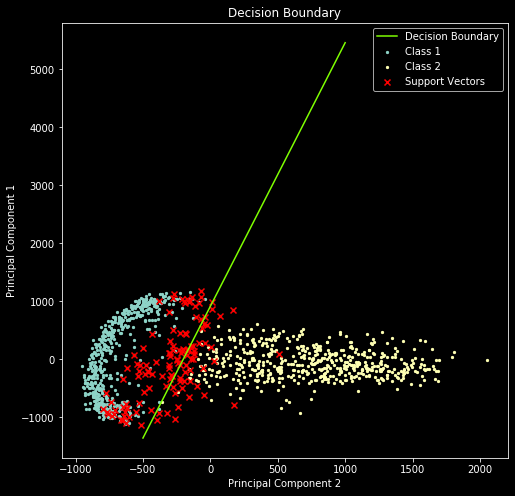

In [25]:
plt.rcParams['figure.figsize'] = [8,8]
print(clf_1.coef_)
w = clf_1.coef_[0]
xx = np.linspace(-500, 1000)
yy = -w[0]/w[1] * xx - (clf_1.intercept_[0])/w[1]
plt.scatter(data_class_1_2D[:,0],data_class_1_2D[:,1],s=5, label="Class 1")
plt.scatter(data_class_2_2D[:,0],data_class_2_2D[:,1],s=5, label="Class 2")
plt.plot(xx, yy, c='chartreuse',label="Decision Boundary")
support_vecs = clf_1.support_vectors_
plt.scatter(support_vecs[:, 0], support_vecs[:, 1], marker='x', c='r', label="Support Vectors")
plt.title("Decision Boundary")
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.legend(loc='upper right')
plt.show()

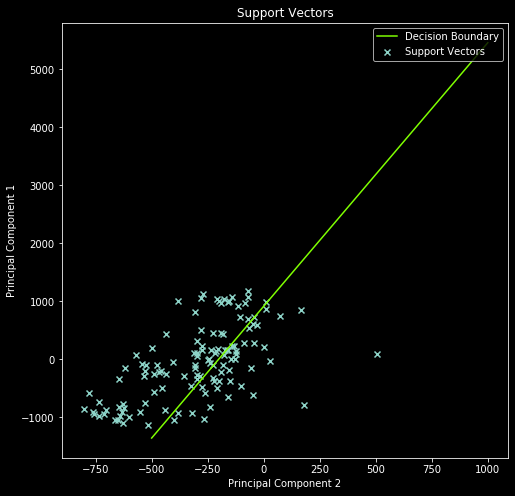

In [26]:
plt.rcParams['figure.figsize'] = [8,8]
w = clf_1.coef_[0]
xx = np.linspace(-500, 1000)
yy = -w[0]/w[1] * xx - (clf_1.intercept_[0])/w[1]
plt.plot(xx, yy,  c='chartreuse', label="Decision Boundary")
plt.scatter(clf_1.support_vectors_[:, 0], clf_1.support_vectors_[:, 1], marker='x', label="Support Vectors")
plt.title("Support Vectors")
plt.ylabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.legend(loc='upper right')
plt.show()

In [27]:
# Variation of Accuracy with C
clf_4 = classifier(X_train_2d, y_train, X_test_2d, y_test, C=1e-10)
print(clf_4)
clf_3 = classifier(X_train_2d, y_train, X_test_2d, y_test, C=1e5)
print(clf_3)


Accuracy: 0.965
Precision: 0.9696969696969697
Recall: 0.96
Confusion Matrix
 [[96  4]
 [ 3 97]]
Accuracy: 0.97
Precision: 0.9895833333333334
Recall: 0.95
Confusion Matrix
 [[95  5]
 [ 1 99]]
SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
SVC(C=1e-05, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
